In [11]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import time
from importlib import reload
from IPython.display import clear_output
from shapely.geometry import LineString, Point

sys.path.insert(0, os.path.join('..', 'rl'))
import arnold
import sensor

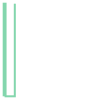

In [32]:
maze = LineString([[-0.1, 0], [-0.1, 5], [0,5], [0,0], [.5,0], [.5,5]])
finish = LineString([[0,5],[.5,5]])
start_heading = [0,.25]
maze

0
0.2497445494646271
0.27590520926022194
0.25727699076549915


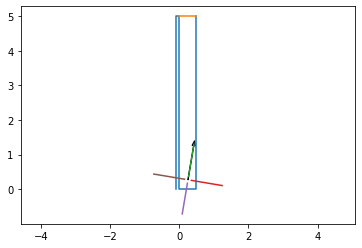

0
0.24442087483116148
0.31257629376500345
0.26655864570002213


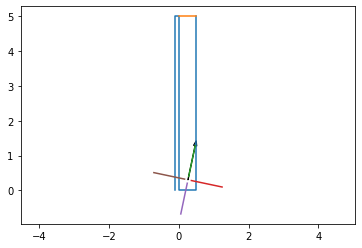

0.7292827317056949
0.24330371177629678
0.34888234708431065
0.2837879967087883


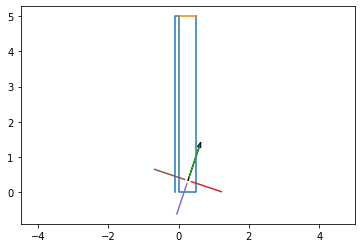

0.811614471415746
0.23569671943434353
0.3605897749128495
0.284960301645546


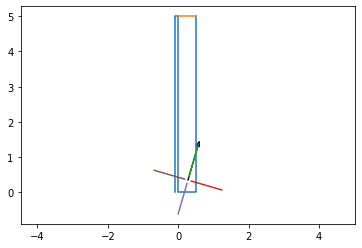

0
0.22469864688760072
0.3757852105644878
0.2777511919440168


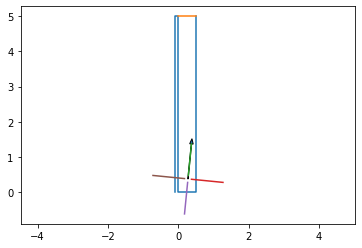

0
0.22454839577836264
0.3900767026595871
0.2759670619711336


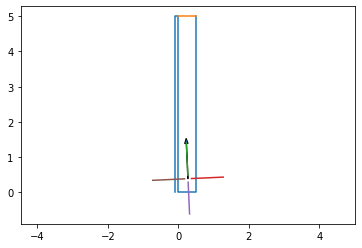

0
0.22298464058273929
0.4187609169857921
0.28199285702849664


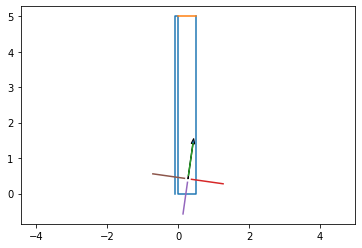

0
0.21948558318432906
0.44252150675478236
0.2847963767520548


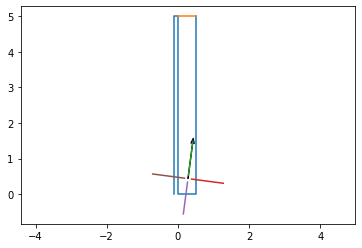

0
0.2150613003527276
0.4830211102957978
0.2862606256886849


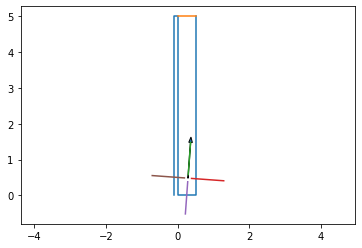

0
0.21557077051674484
0.49915171717437296
0.2850241963994771


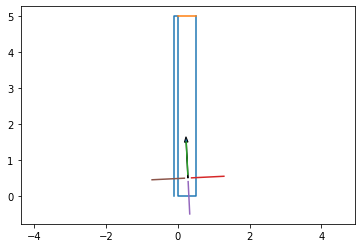

0
0.219664561804925
0.5209663544735661
0.28483973732768136


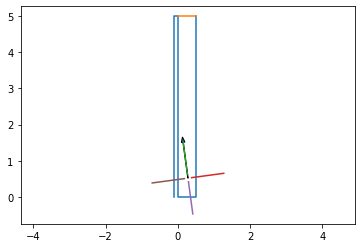

0
0.23099893792099027
0.5581766788815478
0.2846535754109765


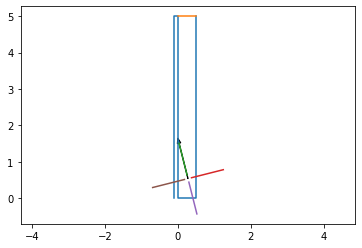

0
0.23121358325769775
0.5606554495365431
0.2825163056695309


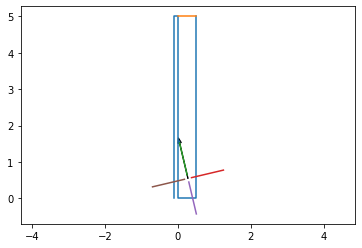

0.9168562326579321
0.24239573207731205
0.5937358813667865
0.2804765334723487


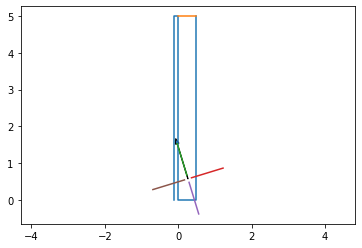

0.6596976955772452
0.25950190345687235
0.6001867301860507
0.28523257696040655


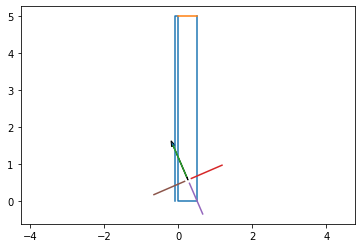

0.7511834786607455
0.2640037326489206
0.649890235977678
0.2665386121775701


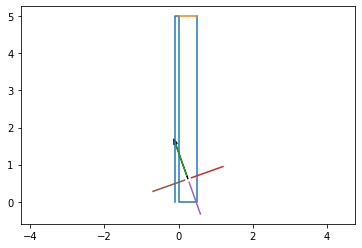

0.6381121277800565
0.28010913637753987
0.6882086897298614
0.2597192387888419


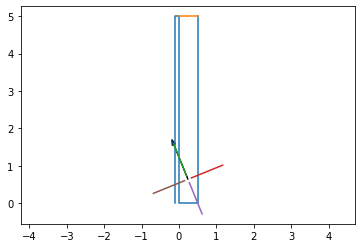

0.5190483280788047
0.3065715960987246
0.643542857447353
0.24726476651869514


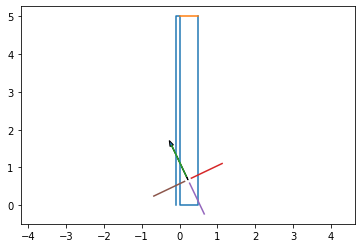

0.42847024424142716
0.33497028301299486
0.6089973531334272
0.2356739290207598


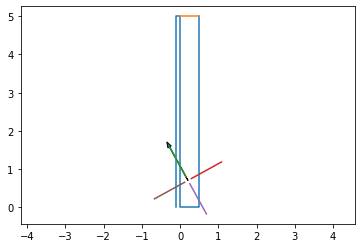

0.426781091545025
0.34029741176641
0.645900720260414
0.2248526689752885


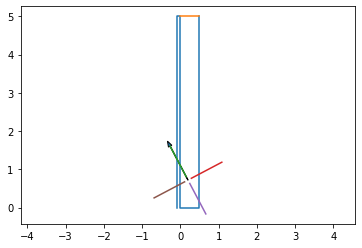

In [53]:
reload(sensor)
sensors = []
min_dist, max_dist = 0.1, 1
sensors.append(sensor.Simple(0, min_dist, max_dist))
sensors.append(sensor.Simple(-np.pi/2, min_dist, max_dist))
sensors.append(sensor.Simple(np.pi, min_dist, max_dist))
sensors.append(sensor.Simple(np.pi/2, min_dist, max_dist))
car = arnold.Arnold()
inp = arnold.ControlInput
inp.heading = np.pi/2
inp.time_step = 1
inp.left_speed = 1
inp.right_speed = 1.5

x = .25
y = .25

for i in range(20):    
    inp.left_speed = np.random.random()
    inp.right_speed = np.random.random()
    dx, dy, deltah = car.step(inp)
    inp.heading += deltah
    x += dx
    y += dy
    for s in sensors:
        s.set_vehicle_pos(x, y, inp.heading)
        print(s.distance(maze))
        
#     print('New position: (' + str(x) + ',' + str(y) + ',' + str(inp.heading) + ')')

#     clear_output(wait=True)
    fig, ax = plt.subplots()
    ax.axis('equal')
    ax.plot(*maze.xy)
    ax.plot(*finish.xy)
    for s in sensors:
        ax.plot(*s.xy)
    ax.arrow(x, y, np.cos(inp.heading), np.sin(inp.heading), width=.01, head_width=.1)
    plt.show()
    time.sleep(0.1)

(-0.1, 2.1, -0.5, 10.5)

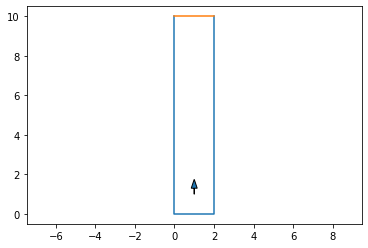

In [31]:
fig, ax = plt.subplots()
ax.plot(*maze.xy)
ax.plot(*finish.xy)
# ax.arrow(*start_point.xy, 0, 1)
ax.arrow(1, 1, 0, 0.3, width=.01, head_width=.3)
ax.axis('equal')

In [4]:
finish.distance(start_point)

9.0